# SedGen weathering

In [1]:
import numpy as np
import numba as nb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

import itertools

In [2]:
from sedgen import initialization as ini
from sedgen import weathering
from sedgen import general as gen
from sedgen import preprocessing

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

____

In [5]:
sedgen_CA_NS = preprocessing.load_obj("sedgen_CA_NS_init")

In [12]:
%%time
sedgen_CA_NS_weathered2 = weathering.Weathering(sedgen_CA_NS, 20, enable_multi_pcg_breakage=False)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Wall time: 11.2 s


In [11]:
sedgen_CA_NS_weathered2.search_size_bins_medians_matrix.shape

(20, 6, 3000)

In [8]:
sedgen_CA_NS_weathered2.search_size_bins_medians.shape

(3000,)

In [30]:
%%time
sedgen_CA_NS_weathered2_after = sedgen_CA_NS_weathered2.weathering(operations=['intra_cb', 'inter_cb', 'chem_mcg', 'chem_pcg'], 
                                                                 display_mass_balance=False, 
                                                                 display_mcg_sums=False,
                                                                 timesteps=None)

Wall time: 17.5 s


In [33]:
sedgen_CA_NS.__repr__

AttributeError: 'SedGen' object has no attribute 'learning_rate'

In [124]:
operations_possibilities = list(itertools.permutations(['chem_pcg', 'intra_cb', 'chem_mcg', 'inter_cb']))
operations_possibilities

[('chem_pcg', 'intra_cb', 'chem_mcg', 'inter_cb'),
 ('chem_pcg', 'intra_cb', 'inter_cb', 'chem_mcg'),
 ('chem_pcg', 'chem_mcg', 'intra_cb', 'inter_cb'),
 ('chem_pcg', 'chem_mcg', 'inter_cb', 'intra_cb'),
 ('chem_pcg', 'inter_cb', 'intra_cb', 'chem_mcg'),
 ('chem_pcg', 'inter_cb', 'chem_mcg', 'intra_cb'),
 ('intra_cb', 'chem_pcg', 'chem_mcg', 'inter_cb'),
 ('intra_cb', 'chem_pcg', 'inter_cb', 'chem_mcg'),
 ('intra_cb', 'chem_mcg', 'chem_pcg', 'inter_cb'),
 ('intra_cb', 'chem_mcg', 'inter_cb', 'chem_pcg'),
 ('intra_cb', 'inter_cb', 'chem_pcg', 'chem_mcg'),
 ('intra_cb', 'inter_cb', 'chem_mcg', 'chem_pcg'),
 ('chem_mcg', 'chem_pcg', 'intra_cb', 'inter_cb'),
 ('chem_mcg', 'chem_pcg', 'inter_cb', 'intra_cb'),
 ('chem_mcg', 'intra_cb', 'chem_pcg', 'inter_cb'),
 ('chem_mcg', 'intra_cb', 'inter_cb', 'chem_pcg'),
 ('chem_mcg', 'inter_cb', 'chem_pcg', 'intra_cb'),
 ('chem_mcg', 'inter_cb', 'intra_cb', 'chem_pcg'),
 ('inter_cb', 'chem_pcg', 'intra_cb', 'chem_mcg'),
 ('inter_cb', 'chem_pcg', 'chem

In [121]:
len(operations_possibilities)

24

In [140]:
final_mass_balance = np.zeros(24)

for i, poss in enumerate(operations_possibilities):
    print(i)
    sedgen_CA_NS_weathered = weathering.Weathering(sedgen_CA_NS, 20, enable_multi_pcg_breakage=False)
    sedgen_CA_NS_weathered_after = sedgen_CA_NS_weathered.weathering(operations=poss, 
                                                                     display_mass_balance=True, 
                                                                     display_mcg_sums=False,
                                                                     timesteps=None);
    final_mass_balance[i] = sedgen_CA_NS_weathered.mass_balance[-1]

0
vol_mcg_total: 0.0 over 0 mcg 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0/20
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 donein 0.0083 seconds
Inter_cb 0 donein 0.2514 seconds
Chem_mcg 0 donein-0.2469 seconds
Chem_pcg 0 donein-0.0110 seconds


Step 0 done in 0.4558 seconds
Time elapsed: 0.4557769000020926 seconds

vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 1811720.1555081434
mcg_chem_residue_total: 0.0
vol_residue_total: 1811720.1555081434
vol_pcg_total: 998286658.7055391 over 4 pcg
new mass balance after step 1: 1000098378.8610473

Intra_cb 1 donein 0.7675 seconds
Inter_cb 1 donein 0.1986 seconds
Chem_mcg 1 donein-0.1961 seconds
Chem_pcg 1 donein-0.0053 seconds


Step 1 done in 1.1238 seconds
Time elapsed: 1.5796244000011939 seconds

vol_mcg_total: 0.0 over 0 mcg
mcg_intr

d:\box sync\programming\python\jupyter_notebooks\sedgen\sedgen\src\sedgen\weathering.py:653: UserWarning: End of chemical states reached, mcg that were reintroduced at zero chemical weathering state during chem_weath_mcg have been rolled back to last chemical weathering state.
  "last chemical weathering state.", UserWarning)


vol_mcg_total: 17836158.044083815 over 225678 mcg
mcg_intra_cb_residue_total: 81728.29908308898
pcg_chem_residue_total: 33732633.17084771
mcg_chem_residue_total: 67648.70798362322
vol_residue_total: 33882010.17791442
vol_pcg_total: 948380210.639049 over 58212 pcg
new mass balance after step 19: 1000098378.8610473

Intra_cb 19 donein 1.3270 seconds
Inter_cb 19 donein 0.4646 seconds
Chem_mcg 19 donein-0.4600 seconds
Chem_pcg 19 donein-0.2562 seconds


Step 19 done in 1.9754 seconds
Time elapsed: 22.471511499999906 seconds

1
vol_mcg_total: 0.0 over 0 mcg 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0/20
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 donein 0.0069 seconds
Inter_cb 0 donein 0.2193 seconds
Chem_mcg 0 donein 0.0028 seconds
Chem_pcg 0 donein-0.2268 seconds


Step 0 done in 0.4153 seconds
Time elapsed: 0.415329200

In [141]:
final_mass_balance

array([1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09,
       1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09,
       1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09,
       1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09,
       1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09,
       1.00009838e+09, 1.00009838e+09, 1.00009838e+09, 1.00009838e+09])

In [135]:
%%time 
sedgen_CA_NS_weathered = weathering.Weathering(sedgen_CA_NS, 20, enable_multi_pcg_breakage=False)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, Wall time: 11 s


In [136]:
%%time
sedgen_CA_NS_weathered_after = sedgen_CA_NS_weathered.weathering(operations=operations_possibilities[9], 
                                                                 display_mass_balance=True, 
                                                                 display_mcg_sums=True,
                                                                 timesteps=None)

mcg sum over minerals after intra_cb but beforeinter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
mcg sum after inter_cb [0 0 0 0 0 0]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 donein 0.0065 seconds
Inter_cb 0 donein 0.2280 seconds
Chem_mcg 0 donein-0.2234 seconds
Chem_pcg 0 donein 0.2234 seconds


Step 0 done in 0.4075 seconds
Time elapsed: 0.4075513999996474 seconds

mcg sum over minerals after intra_cb but beforeinter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
mcg sum after inter_cb [0 0 0 0 0 0]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 1811720.1555081434
mcg_chem_residue_total: 0.0
vol_residue_total: 1811720.15550

In [7]:
%%time
sedgen_CA_NS_weathered_after = sedgen_CA_NS_weathered.weathering(operations=['intra_cb', 'inter_cb', 'chem_mcg', 'chem_pcg'], 
                                                                 display_mass_balance=True, 
                                                                 display_mcg_sums=True,
                                                                 timesteps=None)

mcg sum over minerals after intra_cb but beforeinter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 0.0
mcg_chem_residue_total: 0.0
vol_residue_total: 0.0
vol_pcg_total: 1000098378.8610438 over 2 pcg
new mass balance after step 0: 1000098378.8610438

Intra_cb 0 donein 0.0057 seconds
Inter_cb 0 donein 1.1017 seconds
Chem_mcg 0 donein 0.0036 seconds
Chem_pcg 0 donein 0.0000 seconds


Step 0 done in 1.2712 seconds
Time elapsed: 1.271163700000102 seconds

mcg sum over minerals after intra_cb but beforeinter_cb [0 0 0 0 0 0]
mcg sum after inter_cb [0 0 0 0 0 0]
mcg sum after chem_mcg [0 0 0 0 0 0]
mcg_chem_residue after chem_mcg [0. 0. 0. 0. 0. 0.]
vol_mcg_total: 0.0 over 0 mcg
mcg_intra_cb_residue_total: 0.0
pcg_chem_residue_total: 1811720.1555081434
mcg_chem_residue_total: 0.0
vol_residue_total: 1811720.155508

____

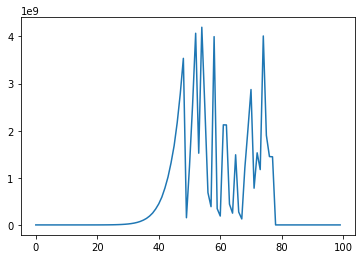

In [8]:
plt.plot(sedgen_CA_NS_weathered.mcg_broken_additions)

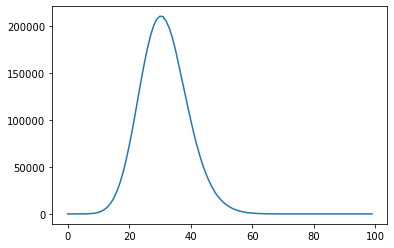

In [9]:
plt.plot(sedgen_CA_NS_weathered.pcg_additions)

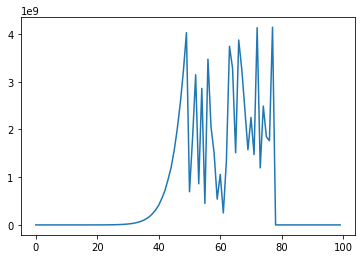

In [10]:
plt.plot(sedgen_CA_NS_weathered.mcg_additions)

In [266]:
preprocessing.save_obj(sedgen_CA_NS_weathered, "sedgen_CA_NS_weathered_73_timesteps")

In [6]:
sedgen_CA_NS_weathered_73 = preprocessing.load_obj("sedgen_CA_NS_weathered_73_timesteps")

___

In [ ]:
pcg = [np.array([0, 1, 2])]
csize = [np.array([200, 500, 400])]
prob = [np.array([0.5, 0.5])]

In [12]:
def add_prob(a):
    """Add probability for no pcg breakage to interface probability
    array based on number of crystals present in pcg."""
    a_new = np.zeros(a.size+1, dtype=a.dtype)
    a_new[:-1] = a / ((a.size + 1) / a.size)
    a_new[-1] = 1 / (a.size + 1)
    return a_new

In [14]:
add_prob(np.array([0.5, 0.25, 0.25]))

array([0.375 , 0.1875, 0.1875, 0.25  ])

In [16]:
np.array([0.5, 0.5, 0.5]) / (3 / 2)

array([0.33333333, 0.33333333, 0.33333333])

____